In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
train=pd.read_csv("../train.csv")

In [28]:
train.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [29]:
train.drop(train.columns[[0]], axis=1, inplace=True)

In [30]:
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Flight'] = 1
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Ship'] = 2
train.Mode_of_Shipment[train.Mode_of_Shipment == 'Road'] = 3

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
train.Product_importance[train.Product_importance == 'high'] = 1
train.Product_importance[train.Product_importance== 'low'] = 2
train.Product_importance[train.Product_importance == 'medium'] = 3

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
train.Gender[train.Gender == 'F'] = 1
train.Gender[train.Gender== 'M'] = 2

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
train.Warehouse_block[train.Warehouse_block == 'A'] = 1
train.Warehouse_block[train.Warehouse_block== 'B'] = 2
train.Warehouse_block[train.Warehouse_block == 'C'] = 3
train.Warehouse_block[train.Warehouse_block== 'D'] = 4
train.Warehouse_block[train.Warehouse_block== 'F'] = 5

C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aspire 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\a

In [34]:
train["Mode_of_Shipment"]= train["Mode_of_Shipment"].astype(int) 
train["Product_importance"]= train["Product_importance"].astype(int) 
train["Gender"]= train["Gender"].astype(int) 
train["Warehouse_block"]= train["Warehouse_block"].astype(int) 

In [35]:
data = train.rename(columns = {"Reached.on.Time_Y.N": "Reached_on_Time_Y_N"})

In [36]:
clustdata=data[(data.Reached_on_Time_Y_N == 1)]

In [37]:
clustdata.head()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                4                 1                    4                2   
1                5                 1                    4                5   
2                1                 1                    2                2   
3                2                 1                    3                3   
4                3                 1                    2                2   

   Cost_of_the_Product  Prior_purchases  Product_importance  Gender  \
0                  177                3                   2       1   
1                  216                2                   2       2   
2                  183                4                   2       2   
3                  176                4                   3       2   
4                  184                3                   3       1   

   Discount_offered  Weight_in_gms  Reached_on_Time_Y_N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [38]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize 
import scipy.cluster.hierarchy as shc 

In [39]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(clustdata) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


In [40]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [41]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(2,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)

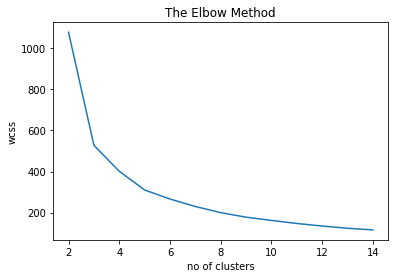

In [42]:
plt.plot(range(2,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10)
c = km.fit_predict(X_principal) 
c


array([0, 0, 0, ..., 2, 2, 2])

In [44]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c, index=result.index)
result.head()

P1        P2  Cluster
0  0.692528  0.030805        0
1  0.371230 -0.018813        0
2  0.379902 -0.335605        0
3  0.259888 -0.033883        0
4  0.535661 -0.393686        0

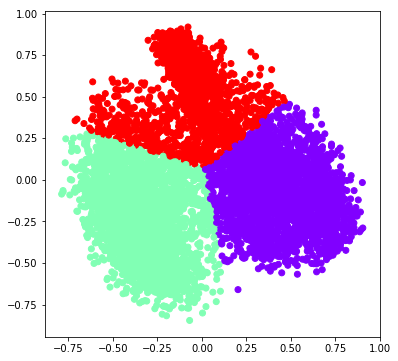

In [45]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(result.iloc[:,0],result.iloc[:,1],c=result['Cluster'], cmap ='rainbow') 
plt.show()

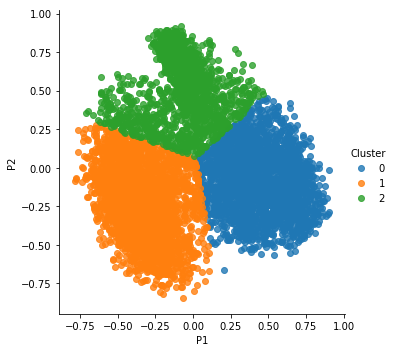

In [48]:
import seaborn as sns
facet = sns.lmplot(data=result,x='P1',y='P2',hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)